In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import dc_stat_think as dcst

In [3]:
h = pd.read_csv("JPY.csv").Close
print(h.iloc[294])
print(h.iloc[295])
print(h.iloc[296])
#print(h[h.isnull()])
h.iloc[295] = np.mean([h.iloc[294],h.iloc[296]]) 
print(h.iloc[294])
print(h.iloc[295])
print(h.iloc[296])

110.07
nan
110.221001
110.07
110.1455005
110.221001


In [4]:
hao = pd.read_csv("JPY.csv").Close
mate = pd.read_csv("AUD.csv").Close

In [5]:
hao.iloc[295] = np.mean([hao.iloc[294], hao.iloc[296]])
mate.iloc[295] = np.mean([mate.iloc[294], mate.iloc[296]])

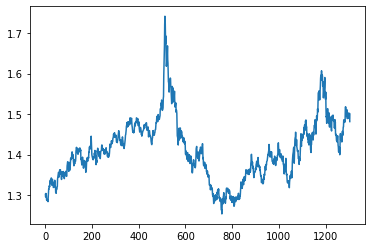

In [6]:
plt.plot(mate)

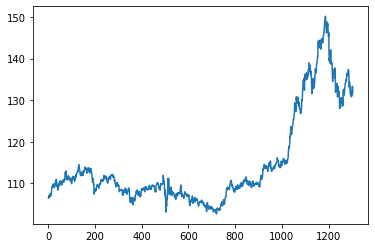

In [7]:
plt.plot(hao)

In [8]:
print(hao[hao.isnull()])
print(mate[mate.isnull()])

Series([], Name: Close, dtype: float64)
Series([], Name: Close, dtype: float64)


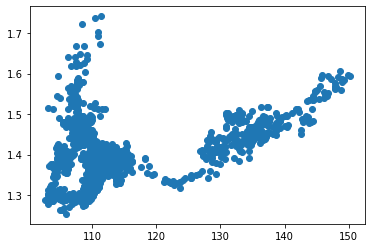

In [9]:
plt.scatter(hao, mate)

----------
## STACJONARNOŚĆ

In [10]:
from statsmodels.tsa.stattools import adfuller

In [11]:
adfuller(mate)

(-2.42730558458061,
 0.13417743875120114,
 0,
 1304,
 {'1%': -3.435374708138995,
  '5%': -2.863758995766637,
  '10%': -2.5679514065499265},
 -8269.623830735702)

In [12]:
adfuller(hao)

(-0.5806829316285894,
 0.8752874251925542,
 0,
 1304,
 {'1%': -3.435374708138995,
  '5%': -2.863758995766637,
  '10%': -2.5679514065499265},
 2465.59433901006)

In [13]:
from scipy.stats import pearsonr

In [14]:
corr, _ = pearsonr(hao, mate)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.377


(-36.15456750485206, 0.0, 0, 1303, {'1%': -3.435378572037035, '5%': -2.863760700696655, '10%': -2.56795231450063}, 1934.2341230645784)
(-35.26854788195442, 0.0, 0, 1303, {'1%': -3.435378572037035, '5%': -2.863760700696655, '10%': -2.56795231450063}, 2576.5732525170934)


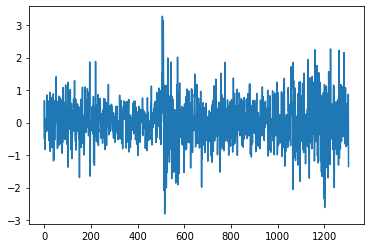

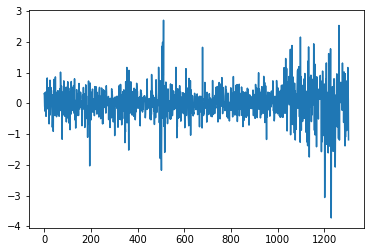

In [147]:
hao1 = np.diff(hao)/hao[:-1]*100
mate1 = np.diff(mate)/mate[:-1]*100
print(adfuller(hao1))
print(adfuller(mate1))
plt.plot(mate1)
plt.show()
plt.plot(hao1)

In [138]:
print(np.var(hao1))
print(np.var(mate1))

2.6174932054556697e-05
4.3278685578915335e-05


In [149]:
#d = pd.Series(hao1).pct_change()
#plt.plot(d)

In [150]:
from scipy import stats
stats.median_abs_deviation(hao1)

0.24982997174721563

------------- 
## Rozkład hao1

In [151]:
print(np.mean(hao1))
print(np.var(hao1))

0.017683698574565847
0.261749320545567


In [152]:
from scipy.stats import logistic
m = np.mean(hao1)
s = np.std(hao1)/np.pi*np.sqrt(3)

from scipy.stats import t
from scipy.stats import hypsecant
from scipy.stats import laplace

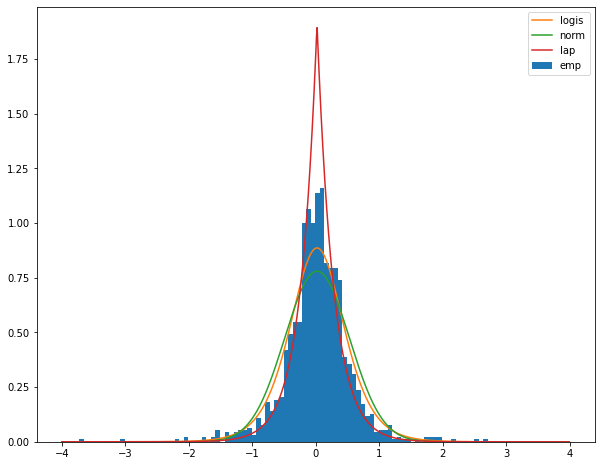

In [156]:
plt.figure(figsize=(10,8))

plt.hist(hao1, bins=90, density = True, label="emp")
xs = np.arange(-4,4,0.01)
y = [logistic.pdf(x, loc=m, scale = s) for x in xs]
y2 = [norm.pdf(x, loc=np.mean(hao1), scale = np.std(hao1)) for x in xs]
y3 = [laplace.pdf(x, loc=np.mean(hao1), scale = np.var(hao1)) for x in xs]
plt.plot(xs,y, label="logis")
plt.plot(xs,y2, label="norm")
plt.plot(xs,y3, label="lap")
plt.legend()
plt.show()

Anderson statistic: 1.0126347381828964

Critical value table
  Significance  Critical value
       0.5000        0.394629
       0.7500        0.566364
       0.8000        0.621810
       0.8500        0.693523
       0.9000        0.798185
       0.9500        0.981762
       0.9750        1.179514
       0.9900        1.443974
       0.9950        1.652188
       0.9975        1.856055
       0.9990        2.140957


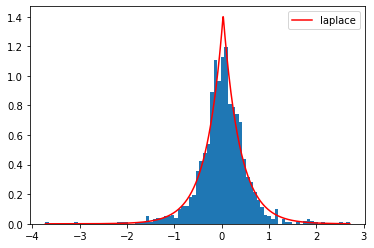

1.0126347381828964

In [157]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sst
import json
import pandas as pd

"""
This Anderson-Darling test for Laplacian distribution assumes that 
we do not know the location and scale parameters of the original distribution.
Null hypothesis: The sample data is drawn from a Laplacian distribution.
If result Anderson Statistic is larger than the critical value, 
the null hypothesis is rejected at the corresponding significance level.
Source for critical values:
https://www.tandfonline.com/doi/pdf/10.1081/SAC-9687287
Example code is at the bottom. Simply run the whole file to run example code
"""

def laplace_ad_test(data):
    data = np.array(data)
    loc = np.median(data)
    n = data.shape[0]
    scale = np.sum(np.abs(data-loc))/n

    z_i = np.zeros_like(data)

    for i, d in enumerate(data):
        if d < loc:
            z_i[i] = np.exp((d-loc)/scale)/2
        else:
            z_i[i] = 1 - np.exp((-d+loc)/scale)/2


    rank = np.arange(1, n+1)
    z_i = np.sort(z_i)
    rev_z_i = np.flip(z_i)
    s = (2*rank-1)/n
    s *= (np.log(z_i)+np.log(1-rev_z_i))
    s = np.sum(s)
    A_sq = -n-s

    print("Anderson statistic: {}\n".format(A_sq))
    fetch_crit_value(n)

    x = np.linspace(np.min(data), np.max(data), 1000)
    pdf = np.exp(-abs(x-loc)/scale)/(2.*scale)
    plt.plot(x, pdf, color='red', label='laplace')
    plt.hist(data, bins=85, density=True)
    plt.legend()
    plt.show()

    return A_sq


def fetch_crit_value(n):
    if n%2 == 1:
        table = np.array([[0.5,     -0.928269,  0.2916],
                          [0.75,    -0.569497,  0.2637],
                          [0.8,     -0.477586,  0.2636],
                          [0.85,    -0.367685,  0.2600],
                          [0.9,     -0.227272,  0.2525],
                          [0.95,    -0.017972,  0.2053],
                          [0.975,   0.163424,   -0.0755],
                          [0.990,   0.365898,   -0.2964],
                          [0.995,   0.503329,   -0.6978],
                          [0.9975,  0.623224,   -0.8344],
                          [0.999,   0.760512,   -1.0847]])
    else:
        table = np.array([[0.5,     -0.932288,  3.2310],
                          [0.75,    -0.571021,  3.2644],
                          [0.8,     -0.477644,  3.2895],
                          [0.85,    -0.368555,  3.3703],
                          [0.9,     -0.228027,  3.4067],
                          [0.95,    -0.018564,  0.2053],
                          [0.975,   0.162622,   3.2346],
                          [0.990,   0.365076,   3.0296],
                          [0.995,   0.500015,   2.7197],
                          [0.9975,  0.616555,   2.4751],
                          [0.999,   0.759613,   2.1387]])

    crit_val = {'Significance':[], 'Critical value':[]}
    for row in table:
        crit_val['Significance'].append(row[0])
        crit_val['Critical value'].append(np.exp(row[1]+row[2]/n))

    crit_val = pd.DataFrame.from_dict(crit_val)
    print("Critical value table\n", crit_val.to_string(index=False))


# Example run ###

data = hao1
laplace_ad_test(data)


##If result Anderson Statistic is larger than the critical value, 
##the null hypothesis is rejected at the corresponding significance level.
#################

In [158]:
stats.ttest_1samp(hao1, popmean=m)

Ttest_1sampResult(statistic=0.0, pvalue=1.0)

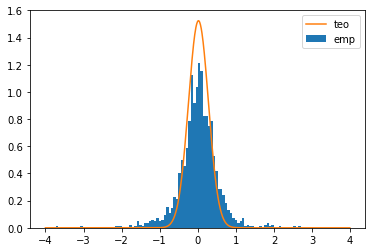

In [159]:
plt.hist(hao1, bins=100, density = True, label="emp")
xs = np.arange(-4,4,0.01)
y = [norm.pdf(x, loc=np.mean(hao1), scale = np.var(hao1)) for x in xs]
plt.plot(xs,y, label="teo")
plt.legend()
plt.show()

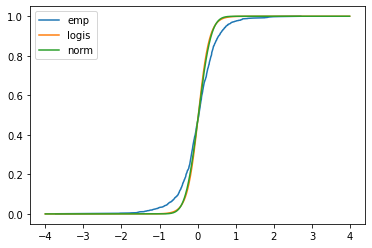

In [160]:
m = np.mean(hao1)
s = np.var(hao1)/np.pi*np.sqrt(3)

x1,y1 = dcst.ecdf(hao1)
plt.plot(x1,y1, label="emp")
xs = np.arange(-4,4,0.01)
y = [logistic.cdf(x, loc=m, scale = s) for x in xs]
y2 = [norm.cdf(x, loc=np.mean(hao1), scale = np.var(hao1)) for x in xs]
plt.plot(xs,y, label="logis")
plt.plot(xs,y2, label="norm")
plt.legend()
plt.show()

zmienna ryzyka, co jest zagrożeniem (spadek czy wzrost), liczymy parametry statystyczne i doprowadzamy do stacjoarnosci,
procentowe zmiany

---------------
# PORTFEL

### miary zmiennosci


In [183]:
import statistics

In [184]:
def miary_zmiennosci(x):
    #odchylenie standardowe
    stdev = statistics.stdev(x)
    
    #odchylenie przeciętne
    odch_przec = stats.median_abs_deviation(x)
    
    #odchylenie ćwiartkowe
    Q = np.quantile(x, [0.25, 0.75])
    odch_ćw = (Q[1] - Q[0]) / 2
    
    #semiodchylenie std
    semi_std = np.sqrt(np.sum(x[x -np.mean(x)>0] ** 2) / (len(x)-1) )
    
    #semiodchylenie przeciętne
    semi_przec = np.sum(np.abs(x[x -np.mean(x)>0] - np.mean(x))) / (len(x)-1)
    
    data = [['Odchylenie standardowe', stdev], ['Odchylenie przeciętne', odch_przec], ['Odchylenie ćwiartkowe', odch_ćw],
           ['Semiodchylenie standardowe', semi_std], ['Semiodchylenie przeciętne', semi_przec]] 
    df = pd.DataFrame(data, columns=['Miara zmienności', 'Wartość'])
    
    return df

In [187]:
miary_zmiennosci(data1)

,Miara zmienności,Wartość
0,Odchylenie standardowe,0.458016
1,Odchylenie przeciętne,0.233531
2,Odchylenie ćwiartkowe,0.231842
3,Semiodchylenie standardowe,0.328563
4,Semiodchylenie przeciętne,0.159955


In [188]:

miary_zmiennosci(data)

,Miara zmienności,Wartość
0,Odchylenie standardowe,7.910782
1,Odchylenie przeciętne,2.057365
2,Odchylenie ćwiartkowe,2.315390
3,Semiodchylenie standardowe,46.930772
4,Semiodchylenie przeciętne,3.023503


AAAA JESZCZE COV TRZEBA UWZGLEDNIC

## kwantyle

In [167]:
data = 0.71*hao + 0.29*mate
data1 = 0.71*hao1 + 0.29*mate1

In [228]:
d = {"kwantyl" : np.arange(0,1.05,0.05), "portfel" : np.quantile(data, np.arange(0,1.05,0.05)), "stacjonarny_portfel": np.quantile(data1, np.arange(0,1.05,0.05))}
qq = pd.DataFrame(data=d)
qq

,kwantyl,portfel,stacjonarny_portfel
0,0.00,73.274803,-2.931229
1,0.05,74.654749,-0.664215
2,0.10,75.455346,-0.473853
3,0.15,76.220398,-0.369793
4,0.20,76.684243,-0.268526
5,0.25,77.116805,-0.210768
6,0.30,77.522624,-0.153834
7,0.35,77.775903,-0.102101
8,0.40,78.089091,-0.063979
9,0.45,78.338746,-0.015184


---
## dystrybuanta

lightseagreen
teal
darkcyan
gold
lightgreen

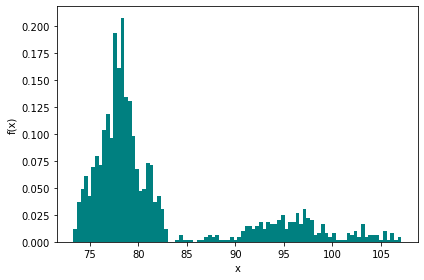

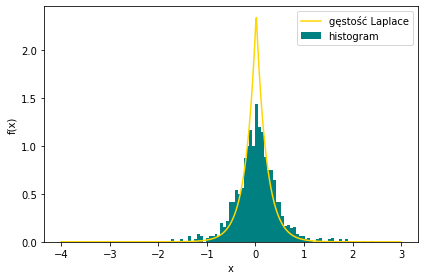

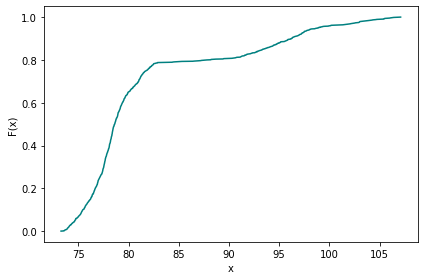

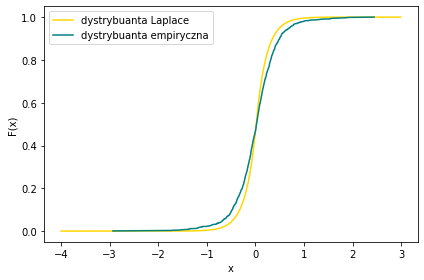

In [169]:
plt.hist(data, bins=90, density = True, color="teal")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.tight_layout()
plt.savefig("portfelhist.pdf", transparent=True)
plt.show()
plt.hist(data1, bins=90, density = True, label="histogram", color="teal")
xs = np.arange(-4,3,0.01)
y = [laplace.pdf(x, loc=np.mean(data1), scale = np.var(data1)) for x in xs]
plt.plot(xs,y, label="gęstość Laplace", color="gold")
plt.legend()
plt.xlabel("x")
plt.ylabel("f(x)")
plt.tight_layout()
plt.savefig("portfelhist1.pdf", transparent=True)
plt.show()


x1,y1 = dcst.ecdf(data)
plt.plot(x1,y1, color="teal")
plt.xlabel("x")
plt.ylabel("F(x)")
plt.tight_layout()
plt.savefig("portfeldystr.pdf", transparent=True)
plt.show()

x1,y1 = dcst.ecdf(data1)
y2 = [laplace.cdf(x, loc=np.mean(data1), scale = np.var(data1)) for x in xs]
plt.plot(xs,y2, label="dystrybuanta Laplace", color="gold")
plt.plot(x1,y1, label="dystrybuanta empiryczna", color="teal")
plt.legend()
plt.xlabel("x")
plt.ylabel("F(x)")
plt.tight_layout()
plt.savefig("portfeldystr1.pdf", transparent=True)

### porównanie z 1.

<ipython-input-173-eecc201157a4>:3: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  kernel = scipy.stats.kde.gaussian_kde(data1)
<ipython-input-173-eecc201157a4>:6: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  kernel = scipy.stats.kde.gaussian_kde(hao1)
<ipython-input-173-eecc201157a4>:9: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  kernel = scipy.stats.kde.gaussian_kde(mate1)


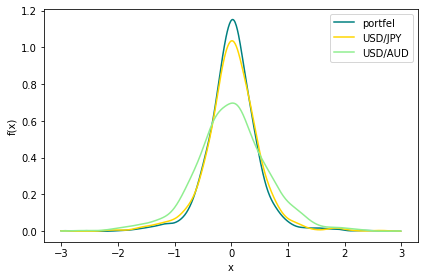

In [173]:
import scipy.stats
x = np.arange(-3, 3, 0.01)
kernel = scipy.stats.kde.gaussian_kde(data1)
y = kernel.evaluate(x)
plt.plot(x,y, label="portfel", color="teal")
kernel = scipy.stats.kde.gaussian_kde(hao1)
y = kernel.evaluate(x)
plt.plot(x,y, label="USD/JPY", color="gold")
kernel = scipy.stats.kde.gaussian_kde(mate1)
y = kernel.evaluate(x)
plt.plot(x,y, label="USD/AUD", color="lightgreen")
plt.legend()
plt.xlabel("x")
plt.ylabel("f(x)")
plt.tight_layout()
plt.savefig("gestosci.pdf", transparent=True)
plt.show()

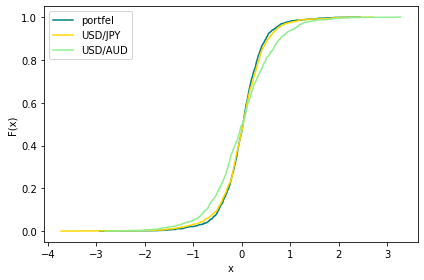

In [227]:
x1,y1 = dcst.ecdf(data1)
x2,y2 = dcst.ecdf(hao1)
x3,y3 = dcst.ecdf(mate1)
plt.plot(x1,y1, label="portfel", color="teal")
plt.plot(x2,y2, label="USD/JPY", color="gold")
plt.plot(x3,y3, label="USD/AUD", color="lightgreen")
plt.legend()
plt.xlabel("x")
plt.ylabel("F(x)")
plt.tight_layout()
plt.savefig("portfeljpy.pdf", transparent=True)

In [219]:
d = {"kwantyl" : np.arange(0,1.05,0.05), "USD/JPY" : np.quantile(hao1, np.arange(0,1.05,0.05)),
     "USD/AUD" : np.quantile(mate1, np.arange(0,1.05,0.05)), 
     "portfel": np.quantile(data1, np.arange(0,1.05,0.05))}
qq = pd.DataFrame(data=d)
c = ["USD/JPY","USD/AUD","portfel"]
qq['Min_wartość'] = qq[c].min(axis=1)
qq['Max_ryzyko'] = qq[c].idxmin(axis=1)
qq['Min_ryzyko'] = qq[c].idxmax(axis=1)
qq

,kwantyl,USD/JPY,USD/AUD,portfel,Min_wartość,Max_ryzyko,Min_ryzyko
0,0.00,-3.724951,-2.812964,-2.931229,-3.724951,USD/JPY,USD/AUD
1,0.05,-0.780778,-1.009341,-0.664215,-1.009341,USD/AUD,portfel
2,0.10,-0.506833,-0.729749,-0.473853,-0.729749,USD/AUD,portfel
3,0.15,-0.393704,-0.584234,-0.369793,-0.584234,USD/AUD,portfel
4,0.20,-0.303227,-0.460543,-0.268526,-0.460543,USD/AUD,portfel
5,0.25,-0.207620,-0.361869,-0.210768,-0.361869,USD/AUD,USD/JPY
6,0.30,-0.163387,-0.282415,-0.153834,-0.282415,USD/AUD,portfel
7,0.35,-0.120060,-0.227361,-0.102101,-0.227361,USD/AUD,portfel
8,0.40,-0.063961,-0.145281,-0.063979,-0.145281,USD/AUD,USD/JPY
9,0.45,-0.016962,-0.061634,-0.015184,-0.061634,USD/AUD,portfel


In [192]:
## aud - większe ryzyko dużych spadków, 
#ale AUD jest bardziej rozproszone i ma więcej średnio małych spadków - -2 a 0 %
## jpy zanotował najwiekszy spadek
##razem działają git i dystrybuanta ma najszybszy wzrost i najmniejsze ryzyko z nich

----------
## dystrybuanta dwuwymiarowa

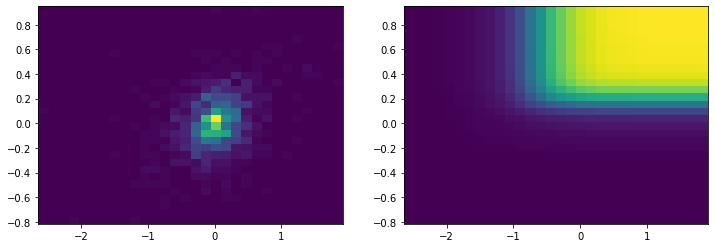

In [220]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))
hist_vals, xbins, ybins, mesh = ax1.hist2d(hao1*0.71, mate1*0.29, bins=30, density=True)
ax2.pcolormesh(xbins, ybins, hist_vals.cumsum(axis=0).cumsum(axis=1))
plt.show()

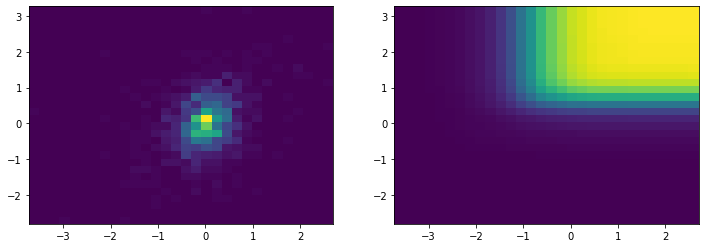

In [225]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))
hist_vals, xbins, ybins, mesh = ax1.hist2d(hao1, mate1, bins=30, density=True)
ax2.pcolormesh(xbins, ybins, hist_vals.cumsum(axis=0).cumsum(axis=1))
plt.show()

<ipython-input-226-b062248b2a76>:11: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  k = kde.gaussian_kde([x,y])


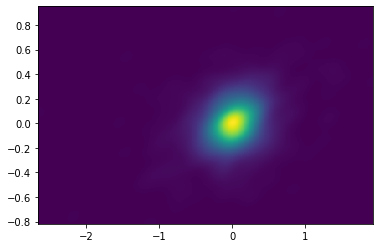

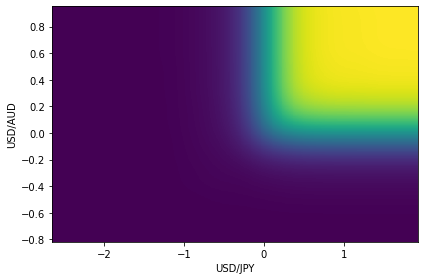

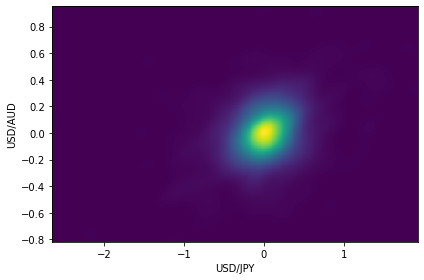

In [226]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kde
 
# create data
x = hao1*0.71
y = mate1*0.29
 
# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
nbins=400
k = kde.gaussian_kde([x,y])
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
# Make the plot - hist
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='auto')
plt.show()

z = zi.reshape(xi.shape) ##z pojedynczego arraya bierze kształt [[..],[..],..]
plt.pcolormesh(xi, yi, z.cumsum(axis=0).cumsum(axis=1), shading='auto', cmap=plt.cm.viridis)
plt.xlabel("USD/JPY")
plt.ylabel("USD/AUD")
plt.tight_layout()
plt.savefig("dystr.pdf", transparent=True)
plt.show() ##dystrybuanta
 
# Change color palette
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='auto', cmap=plt.cm.viridis)
plt.xlabel("USD/JPY")
plt.ylabel("USD/AUD")
plt.tight_layout()
plt.savefig("hist.pdf", transparent=True)


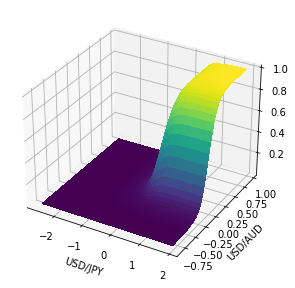

In [222]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(xi, yi, zs, cmap=cm.viridis,
                       linewidth=0, antialiased=False)
plt.xlabel("USD/JPY")
plt.ylabel("USD/AUD")
plt.tight_layout()
plt.savefig("3d.pdf", transparent=True)

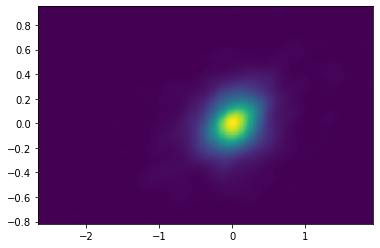

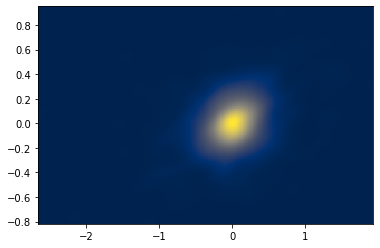

In [223]:
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='auto', cmap=plt.cm.viridis)
plt.show()
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='auto', cmap=plt.cm.cividis)
plt.show()

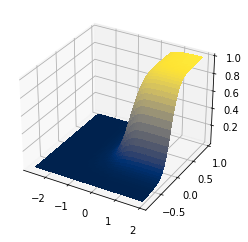

In [224]:
zs = z.cumsum(axis=0).cumsum(axis=1)/z.cumsum(axis=0).cumsum(axis=1)[-1,-1]
from matplotlib import cm
from matplotlib.ticker import LinearLocator

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(xi, yi, zs, cmap=cm.cividis,
                       linewidth=0, antialiased=False)

In [30]:
X = np.linspace(min(xbins), max(xbins), 30)
Y = np.linspace(min(ybins), max(ybins), 30)
X, Y = np.meshgrid(X, Y)
Z = hist_vals.cumsum(axis=0).cumsum(axis=1)